In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("test.csv")

In [3]:
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [5]:
#drop dups, null values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            427 non-null    int64  
 1   baths           427 non-null    float64
 2   size            427 non-null    float64
 3   size_units      427 non-null    object 
 4   lot_size        427 non-null    float64
 5   lot_size_units  427 non-null    object 
 6   zip_code        427 non-null    int64  
 7   price           427 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 30.0+ KB


In [7]:
#check for categorical variables
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 2
Integer variables: 0
Float variables: 4


In [8]:
#one hot encoding
df = pd.get_dummies(data)
print(df)

     beds  baths    size  lot_size  zip_code      price  size_units_sqft  \
0       3    3.0  2850.0   4200.00     98119  1175000.0             True   
1       4    5.0  3040.0   5002.00     98106  1057500.0             True   
2       3    1.0  1290.0   6048.00     98125   799000.0             True   
3       3    2.0  2360.0      0.28     98188   565000.0             True   
4       3    3.5  1942.0   1603.00     98107  1187000.0             True   
..    ...    ...     ...       ...       ...        ...              ...   
500     5    4.5  5580.0      0.30     98146  3800000.0             True   
501     3    2.5  1390.0   1570.00     98126   575000.0             True   
502     3    2.5  2950.0      0.47     98118  3105000.0             True   
503     5    5.0  3010.0   4887.00     98115  1807000.0             True   
504     3    2.0  1301.0   3000.00     98103   895000.0             True   

     lot_size_units_acre  lot_size_units_sqft  
0                  False               

In [9]:
df.head()

,beds,baths,size,lot_size,zip_code,price,size_units_sqft,lot_size_units_acre,lot_size_units_sqft
0,3,3.0,2850.0,4200.00,98119,1175000.0,True,False,True
1,4,5.0,3040.0,5002.00,98106,1057500.0,True,False,True
2,3,1.0,1290.0,6048.00,98125,799000.0,True,False,True
3,3,2.0,2360.0,0.28,98188,565000.0,True,True,False
4,3,3.5,1942.0,1603.00,98107,1187000.0,True,False,True


In [10]:
#Check missing values
df.isnull().sum()

beds                   0
baths                  0
size                   0
lot_size               0
zip_code               0
price                  0
size_units_sqft        0
lot_size_units_acre    0
lot_size_units_sqft    0
dtype: int64

In [11]:
df.corr()

,beds,baths,size,lot_size,zip_code,price,size_units_sqft,lot_size_units_acre,lot_size_units_sqft
beds,1.000000,0.637778,0.706944,0.224281,0.046451,0.421323,NaN,-0.143590,0.143590
baths,0.637778,1.000000,0.661375,0.081513,-0.010136,0.534995,NaN,-0.110038,0.110038
size,0.706944,0.661375,1.000000,0.221479,0.107332,0.694480,NaN,-0.044555,0.044555
lot_size,0.224281,0.081513,0.221479,1.000000,0.114664,0.044033,NaN,-0.589970,0.589970
zip_code,0.046451,-0.010136,0.107332,0.114664,1.000000,0.020748,NaN,0.097741,-0.097741
price,0.421323,0.534995,0.694480,0.044033,0.020748,1.000000,NaN,0.047694,-0.047694
size_units_sqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_size_units_acre,-0.143590,-0.110038,-0.044555,-0.589970,0.097741,0.047694,NaN,1.000000,-1.000000
lot_size_units_sqft,0.143590,0.110038,0.044555,0.589970,-0.097741,-0.047694,NaN,-1.000000,1.000000


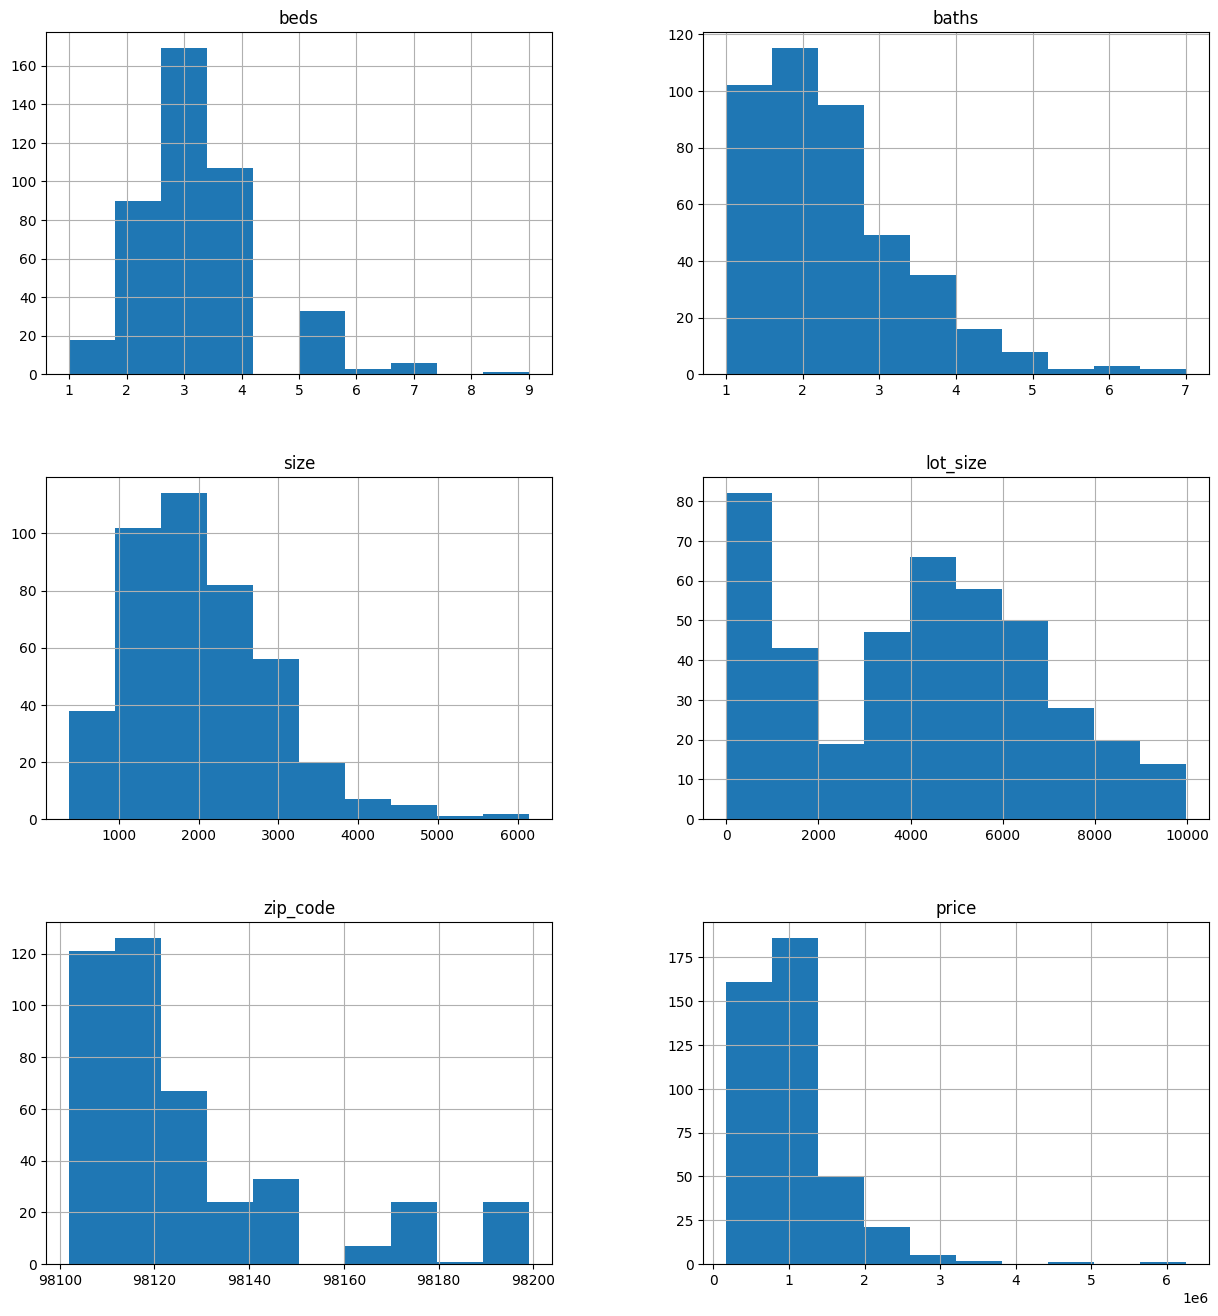

In [14]:

import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(15,16))
plt.show()

In [15]:
#X and Y split
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [16]:
X.head()

,beds,baths,size,lot_size,zip_code,price,size_units_sqft,lot_size_units_acre
0,3,3.0,2850.0,4200.00,98119,1175000.0,True,False
1,4,5.0,3040.0,5002.00,98106,1057500.0,True,False
2,3,1.0,1290.0,6048.00,98125,799000.0,True,False
3,3,2.0,2360.0,0.28,98188,565000.0,True,True
4,3,3.5,1942.0,1603.00,98107,1187000.0,True,False


In [17]:
Y.head()

0     True
1     True
2     True
3    False
4     True
Name: lot_size_units_sqft, dtype: bool

In [18]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)